Hi Esther. I'm Svetlana and will review your project. I've added all my comments to new cells with different coloring. Please don't delete my comments.


The first time I see a mistake, I'll just point it out and let you find it and fix it yourself. In a real job, your boss will do the same, and I'm trying to prepare you to work as an Data Analyst. But if you can't handle this task yet, I'll give you a more accurate hint at the next check.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
If you did something great I'm using green color for my comment
</div>

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 1:
    
If I want to give you advice or think that something can be improved, then I'll use yellow. This is an optional recommendation.
</div>

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
If the topic requires some extra work so I can accept it then the color will be red
</div>

## Review v. 1<a class="tocSkip">

Thank you! Your project has been received. It's clear that you've done a lot of work on it. However, unfortunately, your project is not quite ready for review. This is because the code doesn’t run because of error and period of time for analysis is wrong. You've already done a lot, the rest should be easy to fix!

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Student comment:</b> Hi Svetlana, Thank you so much for testing the project!! I will try to answer and correct any comment.</div>

## Review v. 2<a class="tocSkip">

Congratulations! Your project now is perfect. I'm glad to say that your project has been accepted. Keep at it. You're improving every day! 

# Integrated Project

**Project description** 

Ice is an online store, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. 

We need to identify patterns that determine whether a game succeeds or not. This will allow us to spot potential big winners and plan advertising campaigns. Let’s imagine that it’s December 2016 and the store planning a campaign for 2017. The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Well done that you clearly described the project.
</div>

## 1. Study the general information of the data (games.csv)

**Import all the liberies I'll need for the project**

In [1]:
import pandas as pd
import numpy as np
import math as mt
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from math import factorial
from scipy import stats as st
from functools import reduce

In [2]:
pip install squarify

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import squarify as sq

In [4]:
try:
    games=pd.read_csv('games.csv')
except:
    games=pd.read_csv('/datasets/games.csv')

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Well done for using try-except for the path to the file.
</div>

In [5]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
games.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
3350,Split/Second,X360,2010.0,Racing,0.32,0.23,0.00,0.06,82.0,8.1,E10+
13526,Nanda's Island,DS,2009.0,Puzzle,0.04,0.00,0.00,0.00,NaN,tbd,E
11399,Agatha Christie: Evil Under the Sun,Wii,2008.0,Adventure,0.06,0.01,0.00,0.01,46.0,7.3,T
14701,Calcio Bit,GBA,2006.0,Sports,0.00,0.00,0.03,0.00,NaN,NaN,NaN
3658,Soccer Tsuku 2002: J-League Pro Soccer Club o ...,PS2,2002.0,Sports,0.00,0.00,0.55,0.00,NaN,NaN,NaN


In [7]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Conclusion:

**Data description**

* <strong><em>Name</em></strong> - Name of the games, contain two missing values
* <strong><em>Platform</em></strong> - The type of platform on which the game is played
* <strong><em>Year_of_Release</em></strong> - The year in which the game was released, contain 269 missing values and its float type although it is a value of years
* <strong><em>Genre</em></strong> - Contain two missing values enteries in the same rows of the name
* <strong><em>NA_sales</em></strong> - North American sales in USD million
* <strong><em>EU_sales</em></strong> - Europe sales in USD million
* <strong><em>JP_sales</em></strong> - Japan sales in USD million
* <strong><em>Other_sales</em></strong> - Sales in other countries in USD million
* <strong><em>Critic_Score</em></strong> - Maximum of 100, contain 8578 missing values
* <strong><em>User_Score</em></strong> - Maximum of 10, contain 6701 issing values and its object type although it is a value of score due to its contain "tbd" values
* <strong><em>Rating</em></strong> - ESRB: The Entertainment Software Rating Board, contain 6766 missing values

-The table contain upper and lower case.

-Data for 2016 may be incomplete.



<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
It's great that you clearly described fields of data.
</div>

## 2. Data preprocessing

**The tasks:**

1. Change the table to lower case values for convenience
2. Fill in the missing values for year of release column depending on the year the same game release on a different platform
3. Drop the two rows conatin missing values in name and genre columns
4. Change the "tbd" values in user_score column to NaN because it is not possible to know when the score will be determined and there are those whose score was not yet determined many years ago
4. Fill in the missing values for critic and user score depending on the ratio of user_score to critic_score. The ratio between them is about 10 times and it makes sense because it reflects the consensus of all those who score the game. It fills in only a few missing values but adds a few more values to the future analysis
5. Calculate the total sales (the sum of sales in all regions) for each game

**1. Change the table to lower case values for convenience:**

In [8]:
games.columns=games.columns.str.lower()

In [9]:
games['name']=games['name'].str.lower()
games['platform']=games['platform'].str.lower()
games['genre']=games['genre'].str.lower()
games['rating']=games['rating'].str.lower()

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
It's great that you bring columns to the lower case.
</div>

**2. Fill in the missing values for year_of release_column:**

In [10]:
#Exsample:
games.query('name=="madden nfl 07"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
241,madden nfl 07,ps2,2006.0,sports,3.63,0.24,0.01,0.61,84.0,8.2,e
972,madden nfl 07,x360,2006.0,sports,1.66,0.00,0.01,0.13,80.0,6,e
2035,madden nfl 07,xb,2006.0,sports,0.97,0.03,0.00,0.03,83.0,8.7,e
2479,madden nfl 07,psp,NaN,sports,0.77,0.03,0.00,0.04,78.0,6.6,e
3229,madden nfl 07,gc,2006.0,sports,0.48,0.13,0.00,0.02,82.0,9.2,e
3838,madden nfl 07,ps3,2006.0,sports,0.47,0.00,0.01,0.04,76.0,4.2,e
4006,madden nfl 07,wii,2006.0,sports,0.46,0.00,0.00,0.04,81.0,8,e
7372,madden nfl 07,ds,2006.0,sports,0.20,0.00,0.00,0.02,70.0,6.5,e
14889,madden nfl 07,gba,2006.0,sports,0.02,0.01,0.00,0.00,68.0,9.3,e


In [11]:
games['year_of_release']=games['year_of_release'].fillna(games.groupby(['name'])['year_of_release'].transform('mean'))

In [12]:
#Exsample:
games.query('name=="madden nfl 07"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
241,madden nfl 07,ps2,2006.0,sports,3.63,0.24,0.01,0.61,84.0,8.2,e
972,madden nfl 07,x360,2006.0,sports,1.66,0.00,0.01,0.13,80.0,6,e
2035,madden nfl 07,xb,2006.0,sports,0.97,0.03,0.00,0.03,83.0,8.7,e
2479,madden nfl 07,psp,2006.0,sports,0.77,0.03,0.00,0.04,78.0,6.6,e
3229,madden nfl 07,gc,2006.0,sports,0.48,0.13,0.00,0.02,82.0,9.2,e
3838,madden nfl 07,ps3,2006.0,sports,0.47,0.00,0.01,0.04,76.0,4.2,e
4006,madden nfl 07,wii,2006.0,sports,0.46,0.00,0.00,0.04,81.0,8,e
7372,madden nfl 07,ds,2006.0,sports,0.20,0.00,0.00,0.02,70.0,6.5,e
14889,madden nfl 07,gba,2006.0,sports,0.02,0.01,0.00,0.00,68.0,9.3,e


The rest of the rows with the missing values in year_of_release column I remove because there are only 146 rows left which is less than 1% of the total data.

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Could you please explain why you filled a missing values in the year_of_release column by mean?
</div>

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Student comment:</b> Yes, you're right, I did not explain it, sorry🤦🏻. Games with the same names were usually released in the same year, and therefore, an average of several numbers that are the same will remain the same number.Games that have a missing value in their release year and their name already exists elsewhere in the table and contains a certain value in the release year column, can be relied upon to fill a missing value since an average of several years that are the same, will be the same year. I gave you an example above using the game "madden nfl 07": All games that have this name were released in 2006, the average of 2006 double 8 times is 2006, so the missing value can also be 2006. </div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, you are right :) Well done that you clearly explained your method to fill a missing value in the year_of_release column.
</div>

In [13]:
#Drop the rest of rows with missing values
games=games.dropna(subset=['year_of_release'])

#Change the type to int
games['year_of_release']=games['year_of_release'].astype(int)

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, 'year_of_release' should be int.
</div>

**3. Drop the two rows conatin missing values in name and genre columns:**

In [14]:
games=games.dropna(subset=['name'])

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, we can drop two rows.
</div>

**4. Change the "tbd" values in user_score column to NaN:**

In [15]:
games['user_score']=games['user_score'].replace('tbd', np.nan)

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, 'tbd' is expected to be NaN.
</div>

**5. Fill in the missing values for critic and user score:**

* Chage the type to float
* Fill in the missing values depending on the same games score on a different platfom
* Fill in the missing values of critic_score 10 times from user_score
* Fill in the missing values of user_score divide by 10 from critic_score

In [16]:
#Change the types of critic and user score columns to float
games['critic_score']=games['critic_score'].astype(float)
games['user_score']=games['user_score'].astype(float)

In [17]:
#games['critic_score']=games['critic_score'].fillna(games.groupby(['name'])['critic_score'].transform('mean'))
#games['user_score']=games['user_score'].fillna(games.groupby(['name'])['user_score'].transform('mean'))

In [18]:
#games['critic_score']=games['critic_score'].fillna(games['user_score']*10)

In [19]:
#games['user_score']=games['user_score'].fillna(games['critic_score']/10)

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Could you please explain why you filled a missing values using these methods? What is a possible reason of a missing values?
</div>

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Student comment:</b> You're right, I initially thought of a way to fill in some of the missing values, but on second thought that's not true. I deleted itץ The reasons there are missing values are because maybe players just did not score the game or the game is not popular enough for enough people to play it and score it.</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Ok :)
</div>

**6. Calculate the total sales (the sum of sales in all regions) for each game:**

In [20]:
#Addition of all sales columns and create a new column
games['total_sales']=games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [21]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 12 columns):
name               16567 non-null object
platform           16567 non-null object
year_of_release    16567 non-null int64
genre              16567 non-null object
na_sales           16567 non-null float64
eu_sales           16567 non-null float64
jp_sales           16567 non-null float64
other_sales        16567 non-null float64
critic_score       8075 non-null float64
user_score         7540 non-null float64
rating             9868 non-null object
total_sales        16567 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


### Conclusion:

The data preprocessing part was completed, the missing values were filled in, the column types were changed to the required type, the total_sales column was added and now we  can start analyzing the data.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Ok, lets move to the data analysis.
</div>

## 3. Analyze the data

The data analysis will be done in several steps according to the company’s requirements

**1. Look at how many games were released in different years:**

In order to find the distribution of game releases over the years one has to create a bar plot describing all the years and the amount of games released each year.

In [22]:
#Pivot table to group the amount of games released each year
df=games.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()

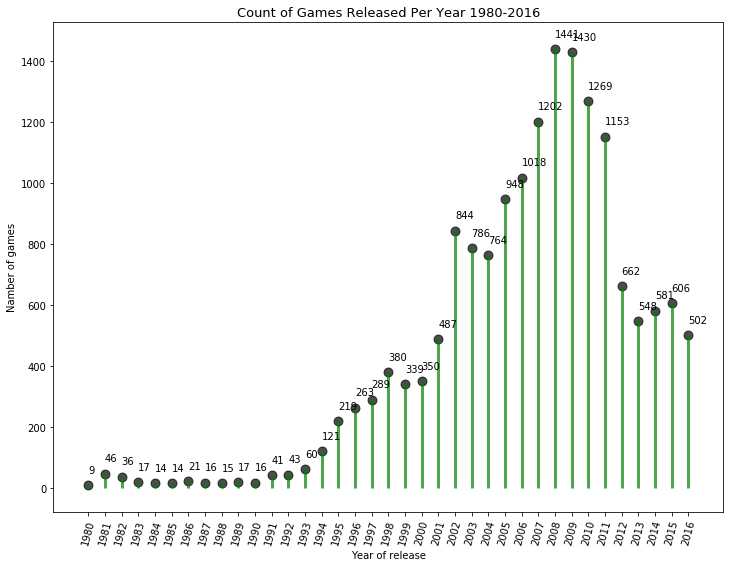

In [23]:
#Lollipop chart to desctibe the amount of games released each year

#Appearance and conditions:
fig,ax=plt.subplots(figsize=(12,9))
ax.vlines(x=df.year_of_release, ymin=0, ymax=df.name, alpha=0.7, color='green', linewidth=3)
ax.scatter(x=df.year_of_release, y=df.name, s=80, color='black', alpha=0.7)

#Titles:
ax.set_title('Count of Games Released Per Year 1980-2016', fontdict={'size':13})
ax.set_ylabel('Namber of games')
ax.set_xlabel('Year of release')
ax.set_xticks(df.year_of_release)
ax.set_xticklabels(df.year_of_release, rotation=75)

#Value of each segment and a circle:
for row in df.itertuples():
    ax.text(row.year_of_release, row.name+40, s=round(row.name, 2))

plt.show()

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
You have made  an excellent graph 	👍👍👍
</div>

**Is the data for every period significant?**

According to the lollipop chart it can be seen that until 1993 almost no games were released, this makes sense since the computer age only started during this period and games were almost non-existent. The significant increase started after that, but I decided to take values starting in 2002 since it is not so relevant to know what games were 20 years ago because the technologies and computing have completely changed since.

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 1:
    
Could you please describe a possible reason of increase and decrease the number of games?
</div>

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Student comment:</b> The reason for the increases and decreases in the number of games over the years stems from the history of computer games: until 1993 computer games were still not so popular, not many people owned a computer at home and therefore there was almost no demand for it. Then an upward trend began until the early 2000s video games became one of the most popular means of entertainment in the world. During the decade, various innovations entered the home console market and the personal computer market. In addition the portable console market has become much more competitive. When the peak was in 2008 when total sales of video games and game consoles worldwide reached more than $ 21 billion (perhaps because of the economic crisis that left many people at home ...).
In 2011 there was a significant drop in computer games probably due to the entry of smartphones into the market and many users have moved to play through mobile. In addition, many platforms were no longer relevant because they were old and therefore it was necessary to develop games tailored to specific platforms. </div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
An excellent explanation :)
</div>

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Please note that it's better to use data since 2014. Could you please explain why? Please fix it and I will check the next parts of the project.
</div>

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Student comment:</b> Yes, you are right. Since we want to launch a campaign for 2017 it is necessary to rely on data from years close to 2017, so it makes much more sense to take data starting from 2014. </div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
The reason why to chose data since 2014 is the following. We see that the leader in sales for the entire history of the PS2. But sales by 2011 are already zero. The X360 was at its peak in 2010, but by 2016 it had fallen to almost 0. In general, a sharp decline in the platform can occur in just 3 years. Let's look at this sales horizon.
</div>

**2. Look at how sales varied from platform to platform:**

In order to see the distribution of sales for each platform one has to group the total sales for each platform to standardize using a standard score in order to normalize all the platforms and find which platforms are the most profitable. The farther they are from the zero line (from the average) in the positive direction, the more profitable they will be, and the more negative it will be less profitable.

Standard score equetion:  $ z={x-\mu  \over \sigma }$

A standard score can have any value, positive or negative, where a positive value indicates a high observation in the numerical value of the population expectation, and a negative value indicates a low observation in the numerical value of the population expectation

In [24]:
#Group platform and total sales by platform:
df1=games[['platform', 'total_sales']].groupby(['platform']).sum().sort_values(by='total_sales').reset_index()

In [25]:
#Add a column that calculates the standard score:
df1['ss_sales']=(df1['total_sales']-df1['total_sales'].mean())/df1['total_sales'].std()

In [26]:
#Adding a color column that distinguishes between positive and negative value and will be reflected in the graph I create:
df1['color']=['red' if x<0 else 'green' for x in df1['ss_sales']]

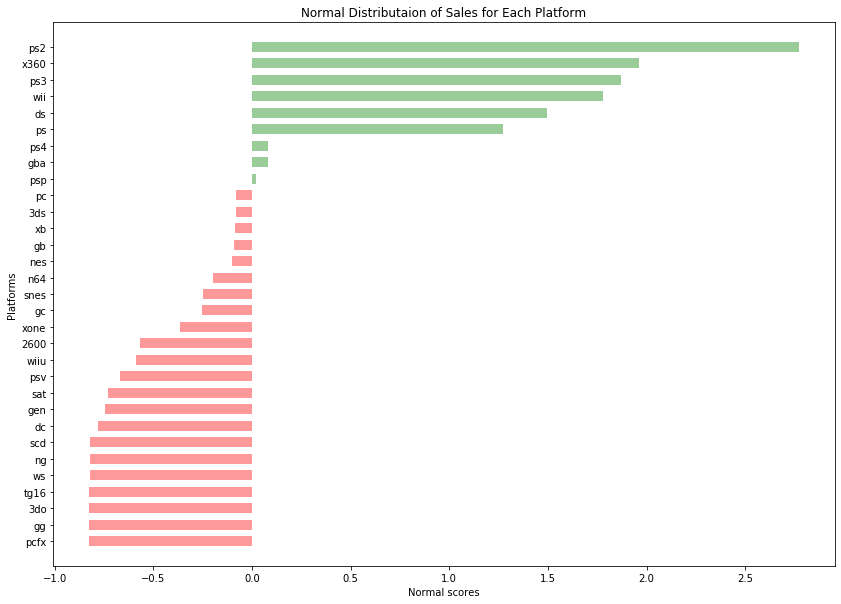

In [27]:
#Graph depicting the normal distribution of each platform:

#Appearance and conditions:
plt.figure(figsize=(14,10))
plt.hlines(y=df1.platform, xmin=0, xmax=df1.ss_sales, color=df1.color, alpha=0.4, linewidth=10)

#Titles:
plt.ylabel('Platforms')
plt.xlabel('Normal scores')
plt.title('Normal Distributaion of Sales for Each Platform')

plt.show()

**Choose the platforms with the greatest total sales and build a distribution based on data for each year:**

According to the graph describing the normal distribution of sales for each platform it can be seen that there are 9 platforms that are the most profitable over the years and the rest are considered smaller and lesser known platforms and therefore also less profitable.Therefore the platforms marked in green are considered to be the most profitable platforms.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
You correctly noted that we have 9 the most profitable platforms.
</div>

**Find platforms that used to be popular but now have zero sales:**

I'll sort the data only for the profitable platforms according the normal distribution above and then I'll create a graph describing the rise and fall of all these platforms.

In [28]:
#Sort the games table for the three relevant columns to new table (df2):
df2=games[['year_of_release', 'platform', 'total_sales']].sort_values(by='year_of_release')
df2=df2.reset_index(drop=True)

#Sort the df2 table for the most profitable platforms:
df2=df2[(df2['platform']=='ps2') | (df2['platform']=='x360') | (df2['platform']=='wii') |
        (df2['platform']=='ps3') | (df2['platform']=='ds') | (df2['platform']=='ps4') | (df2['platform']=='ps')]

#Sort the df2 table for game release year bigger than 1992
df2=df2.query('year_of_release > 1992')

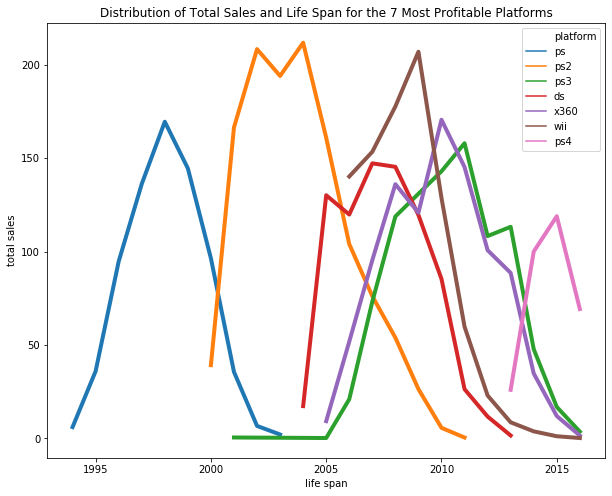

In [29]:
#Line plot depicting the rise and fall of platforms from df2:

#Appearance and conditions:
plt.figure(figsize=(10,8))
sns.lineplot(data=df2, x='year_of_release', y='total_sales', hue='platform', estimator='sum', ci=None, linewidth=4)

#Titles:
plt.title('Distribution of Total Sales and Life Span for the 7 Most Profitable Platforms')
plt.xlabel('life span')
plt.ylabel('total sales')


plt.show()

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Please note that Ridgeplots can be useful here: https://matplotlib.org/matplotblog/posts/create-ridgeplots-in-matplotlib/ 
</div>

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Student comment:</b> Thanks!🙏🏻 I'll save it for later... </div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
👍👍👍
</div>

In [30]:
#Check the total sales for the most profitable:
df2.groupby(['platform'])['total_sales'].sum().sort_values(ascending=False)

platform
ps2     1247.16
x360     966.61
ps3      935.19
wii      903.31
ds       804.26
ps       727.58
ps4      314.14
Name: total_sales, dtype: float64

According to the graph of the distribution of the most profitable platforms it can be seen that almost all the platforms had a period when they were really profitable and then the profits went down. This makes sense, because new products on the way cause buzz and there are more purchases and over the time the enthusiasm goes down or there are new platforms entering the market and therefore the profits of the previous platform go down.

If we look specifically at the PlayStation platform: there are 4 generations (ps, ps2, ps3, ps4) every time there is a drop in sales of the previous generation it indicates that there is a new generation and where sales are rising.

**How long does it generally take for new platforms to appear and old ones to fade?**

This can be found by calculating the average of the years it takes for the platform from the moment it enters the market until it fades.

In [31]:
#Pivot table for df2 to calculate the min and max year for each plaform:
df2_pivot=df2.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()

In [32]:
#Change the name of columns:
df2_pivot.columns=['platform', 'min_year', 'max_year']

In [33]:
#Add column for the gap between max year and min year:
df2_pivot['gap']=df2_pivot['max_year']-df2_pivot['min_year']

In [34]:
#Calculate the mean:
df2_pivot['gap'].mean()

9.714285714285714

The lifespan of profitable platform is about 10 years from the moment it entered the market until it faded and became irrelevant.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, a typical lifespan of the platforms is about 10-11 year. Please note that lifespan is slightly decreased with time.
</div>

**3. Determine what period you should take data for:**

Based on the previous answers I decided to take data from 2014 and the other data are neglected because they are less relevant to research because the goal is to find a model for 2017 and there is no need to take data from a very long time ago

**4. Work only with the data that you've decided is relevant:**

In [35]:
games=games.query('year_of_release>2013')

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Great, all right :)
</div>

**5. Which platforms are leading in sales?**

In order to see which platform is leading in sales since 2014, a Treemap must be created that will show all the platforms and their relative size in relation to the other platforms. This is why I first imported the 'squarifiy' library.

In [36]:
#Pivot table group total sales by platforms for platforms starting from 2002:
games_tree=games.pivot_table(index='platform', values='total_sales', 
                             aggfunc='sum').sort_values(by='total_sales').reset_index()

In [37]:
#Turn total sales into one list:
sizes=games_tree.total_sales.sort_values().tolist()

In [38]:
#Changing the appearance of total sales in order to get an order of magnitude (in dollars):
labels=games_tree.apply(lambda x: str(x[0])+"\n"+"$"+str(round(x[1])), axis=1)

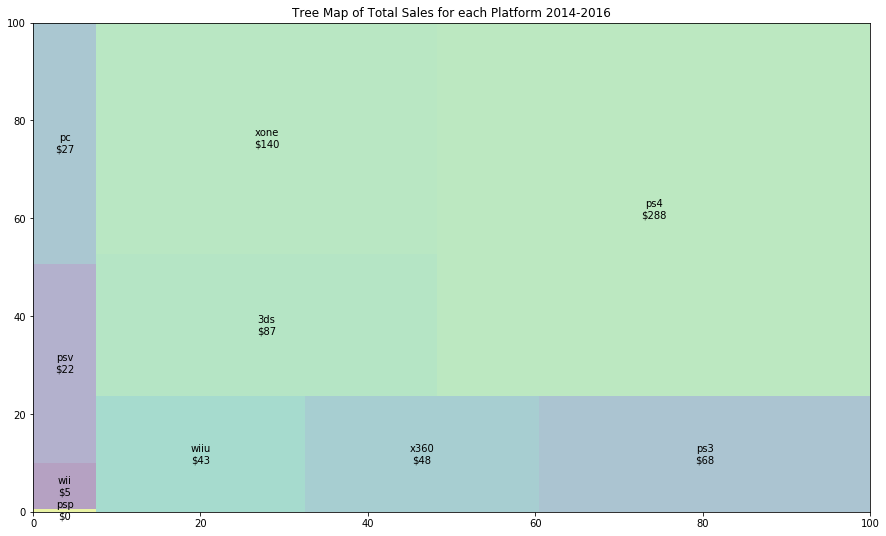

In [39]:
#Treemap appearance and conditions:
plt.figure(figsize=(15,9))
sq.plot(sizes=sizes, label=labels, alpha=0.4)

#Titles
plt.title('Tree Map of Total Sales for each Platform 2014-2016')

plt.show()

According to Treemap it can be seen that the ps4 platform has been the most profitable since 2014

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, this is the most profitable platform. Here will be good to compare the first profitable platform and the second one and add values of the sales.
</div>

**Which ones are growing or shrinking? Select several potentially profitable platforms:**

In order to test which platforms are growing and which platforms are shrinking, a heatmap table can be created that shows in two dimensions the peak areas and the low zones of sales for each platform.

In [40]:
#Pivot table of total sales for each platform per year:
df3=pd.pivot_table(games, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum', fill_value=0)

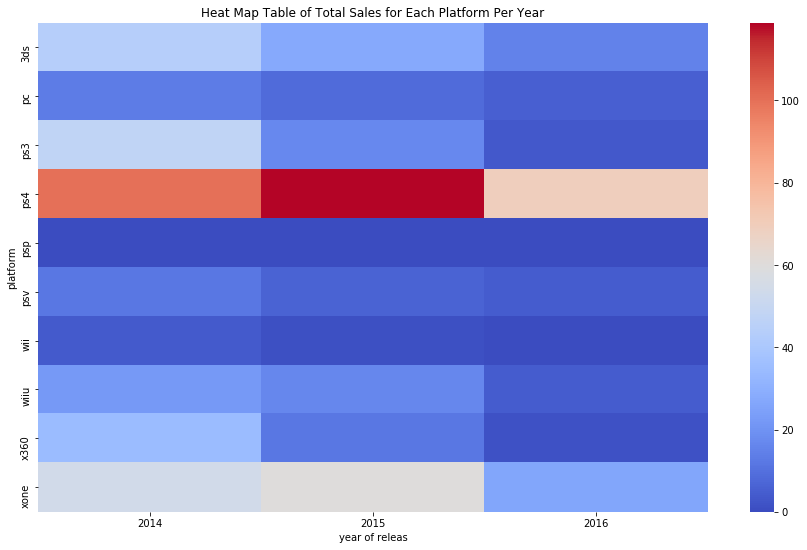

In [41]:
#Heatmap table:
plt.figure(figsize=(15,9))
sns.heatmap(df3.T, cmap='coolwarm')
plt.title('Heat Map Table of Total Sales for Each Platform Per Year')
plt.xlabel('year of releas')

plt.show()

According to the heatmap table it can be understood that the reddest areas are the areas with peak sales and the bluest areas are low sales areas. The vast majority of platforms have a blue color in 2016 and this indicates a srinking platform, except for the ps4 platform as it is considered relatively new (entered the market only at the end of 2013) and is likely to increase further.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
An excellent analysis :)
</div>

**6. Build a box plot for the global sales of all games, broken down by platform:**

In [49]:
#Defining data for building a boxplot
games_group=games.groupby(['platform', 'year_of_release'])['total_sales'].mean().reset_index()
games_order=games_group.groupby(['platform'])['total_sales'].sum().sort_values().reset_index()['platform']
games_group

,platform,year_of_release,total_sales
0,3ds,2014,0.547000
1,3ds,2015,0.323023
2,3ds,2016,0.329130
3,pc,2014,0.282553
4,pc,2015,0.170400
5,pc,2016,0.097222
6,ps3,2014,0.442222
7,ps3,2015,0.230411
8,ps3,2016,0.094737
9,ps4,2014,1.333333


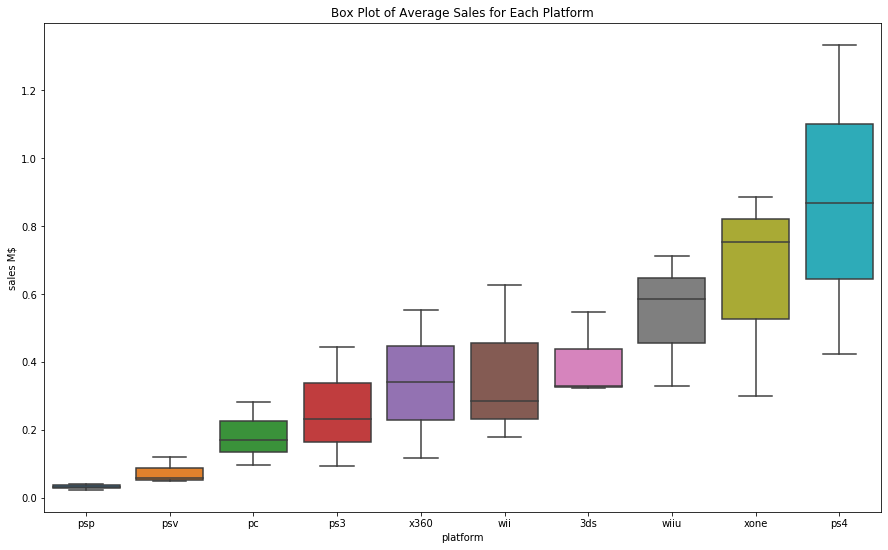

In [50]:
#Box plot
plt.figure(figsize=(15,9))
sns.boxplot(x='platform', y='total_sales', data=games_group, order=games_order)
plt.title('Box Plot of Average Sales for Each Platform')
plt.ylabel('sales M$')
plt.show()

**Are the differences in sales significant?**

Boxplot describes the median sales for each platform as well as the area where it has 25% of total sales and the area where it has 75% of total sales. In addition to outliers. However, it does not describe the total profits and sales volume for each platform but rather the range between large and small sales.

For the PS4 it can be seen that it has had the biggest sales over the years. In addition, its median sales is the highest. It can also be said that the gap between the highest selling and the lowest selling is the biggest in the ps4 and that means there is a very dispersed data. Since we know that this is a relatively new platform one can understand the wide spread of the data since there are some who “fall in love” with the platform and therefore there are big sales, on the other hand, there are some who do not yet know it and are still hesitant with its purchase.

From the difference in the appearance of the boxplot for each platform it can be understood that there is a significant difference in the sales of a platform. The total sales may be similar from platform to platform, but their distribution is different and indicates a different public attitude to each platform.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, you correctly noted that total sales may be similar from platform to platform, but their distribution is different. Well done that you have explained these findings.
</div>

**7. Take a look at how user and professional reviews affect sales for one popular platform:**

Based on previous answers, I chose the ps4 platform for viewing as it is the most profitable platform since 2014. In order to present a scatter plot that reflects reality in a good way, all the missing values in the critic_score and user_score columns must be removed. Since the columns contain the same number of rows with missing values, it is sufficient to remove missing values from one column.

In [44]:
#Drop missing values:
games_s=games.dropna(subset=['critic_score'])

In [45]:
#Sort table gamse for just x360 game, and in order to remove the outliers, total sales smaller than 2M$
games_sx=games_s.query('platform=="ps4"')

**Build a scatter plot:**

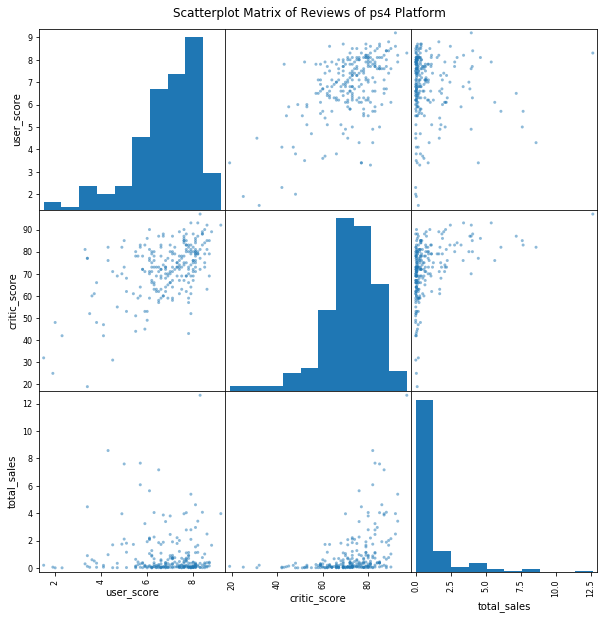

In [46]:
#Matrix scatter plot:
pd.plotting.scatter_matrix(games_sx[['user_score', 'critic_score', 'total_sales']], figsize=(10,10))
plt.suptitle('Scatterplot Matrix of Reviews of ps4 Platform', y=0.91)
plt.show()

**Calculate the correlation between reviews and sales:**

In [47]:
#Change the names of columns:
games_s1=games_s[['critic_score', 'user_score', 'total_sales']]

In [48]:
#Calculate corrolation:
games_s1.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.504460,0.328105
user_score,0.504460,1.000000,0.005202
total_sales,0.328105,0.005202,1.000000


**Draw conclusions:**

According to the matrix scatter plot it can be seen that there is a relatively positive trend between the total sales and the score obtained and the more satisfied customers (high score) the more they will purchase from this platform. Relatively. The correlation shows that there is a partial positive relationship between sales and scoring.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, we have weak correlation between variables. Please note that correlation function shows only linear dependecy between variables. Maybe this link will be interesting for you: https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/.
</div>

**8. Compare the sales of the same games on other platforms:**

In order to see for a specific game which platform is most profitable for it (for a game played on several platforms), a function must be created that will get a game name, check on how many platforms it is played and return a bar plot describing the profitability of each platform for a specific game.

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Please fix the error below (code doesn't run). 
</div>

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Student comment:</b> Yes, now it should work </div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, now it works :)
</div>

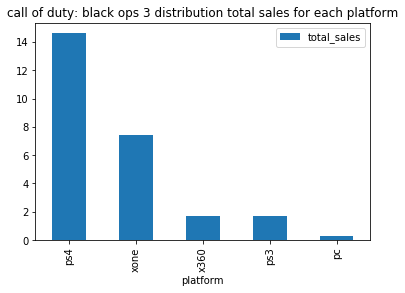

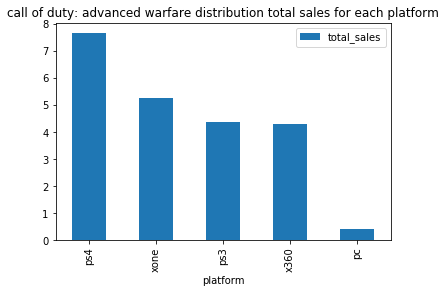

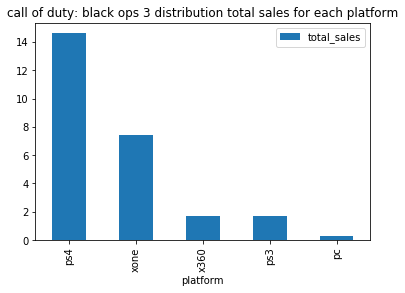

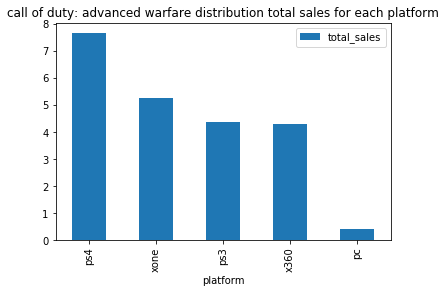

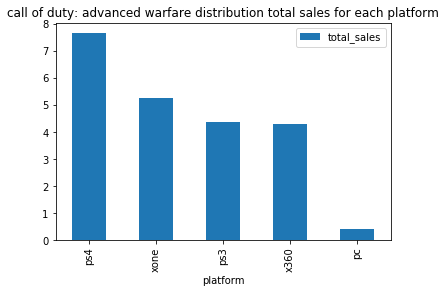

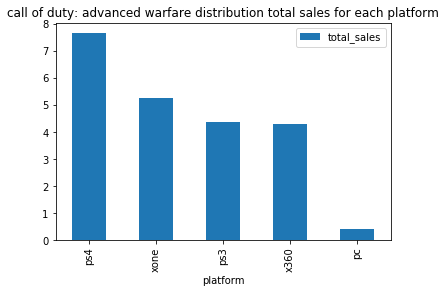

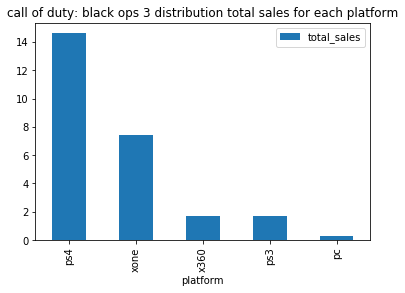

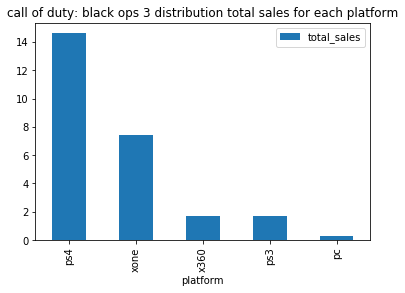

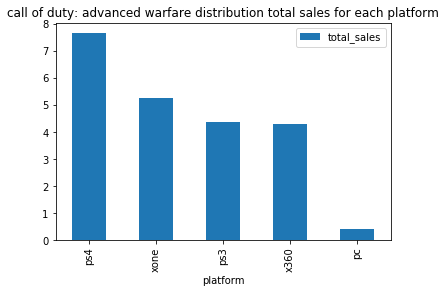

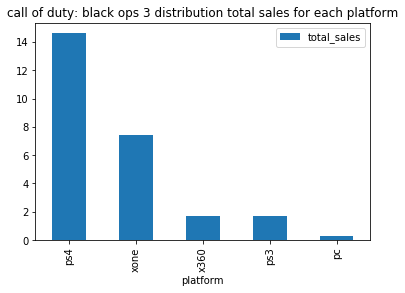

In [49]:
#Function get name of game and return par plot of all platforms
def platform_effect(row):
    name=row['name']
    data=games[games['name']==name]
    
    #Only for games with high total sales and only those that are played on more than one platform
    if (data['platform'].count() > 1) and (data['total_sales'].sum() > 20):
        return data.plot.bar(x='platform', y='total_sales', title=name+' distribution total sales for each platform')

games['name']=games.apply(platform_effect, axis=1)

According to expectations: The computer games played on the ps4 and xone platform are the most profitable these years as these are the most popular platforms.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Good job, you have made a correct conclusion.
</div>

**9. Take a look at the general distribution of games by genre:**

In [50]:
#Pivot table for total sales group by genre:
games_pivot=games.pivot_table(index='genre', values='total_sales', aggfunc=['count', 'sum', 'mean']).reset_index()

In [51]:
#Change the name of columns for convenience:
games_pivot.columns=['genre', 'count', 'total_sales', 'mean']

In [52]:
#Sort values by total sales:
games_pivot.sort_values(by='total_sales', ascending=False, inplace=True)

In [53]:
games_pivot

,genre,count,total_sales,mean
0,action,619,199.36,0.322068
8,shooter,128,170.94,1.335469
10,sports,161,109.48,0.680000
7,role-playing,221,101.44,0.459005
3,misc,113,37.55,0.332301
2,fighting,60,28.22,0.470333
6,racing,69,27.52,0.398841
4,platform,38,18.09,0.476053
1,adventure,185,17.55,0.094865
9,simulation,44,13.13,0.298409


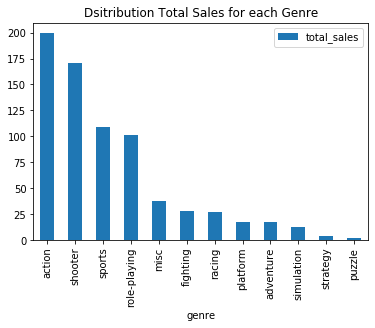

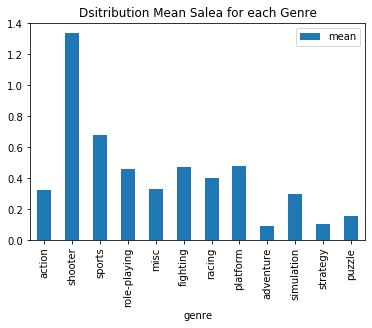

In [54]:
#Bar plot for distribition of total sales per genre:
games_pivot.plot.bar(x='genre', y='total_sales', title='Dsitribution Total Sales for each Genre')
games_pivot.plot.bar(x='genre', y='mean', title='Dsitribution Mean Salea for each Genre')
plt.show()

**What can we say about the most profitable genres?**

It can be seen that the action games genre is the most profitable and buy it the most. In contrast, the average sales of the shooter games genre is the highest even though it is ranked second in terms of profitability. It can be understood that although there are fewer people who play in the shooter genre they are willing to pay more for the game and therefore the average of its sales is higher

### Counclusion:

After analyzing the data from various aspects like platform type, score, and genre type, its can be seen over the years there were several platforms that are the most profitable, user score and reviews partially affects total sales, and there are specific genres that are the most profitable of all genres since they have the most players.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, you correctly defined the most popular genres. But it will be better to explain these preferences.
</div>

# 4. Create a user profile for each region

For each region (NA, EU, JP), determine:

**1. The top five platforms:**

Sort each region into a separate table and select the 5 most profitable platforms in each region and then compare the different platforms for each region using a pei chart.

In [55]:
#Sort North American region using pivot table:
na_sales=games.pivot_table(index='platform', values='na_sales', 
                           aggfunc='sum').sort_values(by='na_sales', ascending=False).reset_index()
na_sales=na_sales.query('na_sales > 0')

#Choose the 5 most profitable:
na=na_sales.nlargest(5,['na_sales'])
na.columns=['platform', 'total_sales']
na=na.set_index('platform')

In [56]:
#Sort Europe region using pivot table:
eu_sales=games.pivot_table(index='platform', values='eu_sales', 
                           aggfunc='sum').sort_values(by='eu_sales', ascending=False).reset_index()
eu_sales=eu_sales.query('eu_sales > 0')

#Choose the 5 most profitable:
eu=eu_sales.nlargest(5,['eu_sales'])
eu.columns=['platform', 'total_sales']
eu=eu.set_index('platform')

In [57]:
#Sort Japan region using pivot table:
jp_sales=games.pivot_table(index='platform', values='jp_sales', 
                           aggfunc='sum').sort_values(by='jp_sales', ascending=False).reset_index()
jp_sales=jp_sales.query('jp_sales > 0')

#Choose the 5 most profitable:
jp=jp_sales.nlargest(5,['jp_sales'])
jp.columns=['platform', 'total_sales']
jp=jp.set_index('platform')

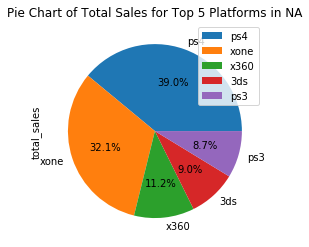

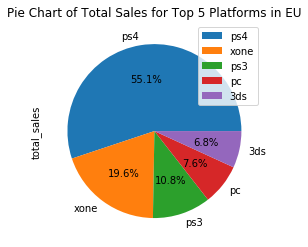

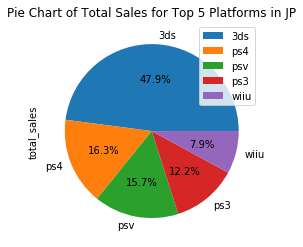

In [58]:
#Pei chart:
na.plot.pie(y='total_sales', subplots=True, figsize=(4,4), autopct='%1.1f%%')
plt.title("Pie Chart of Total Sales for Top 5 Platforms in NA")
eu.plot.pie(y='total_sales', subplots=True, figsize=(4,4), autopct='%1.1f%%')
plt.title("Pie Chart of Total Sales for Top 5 Platforms in EU")
jp.plot.pie(y='total_sales', subplots=True, figsize=(4,4), autopct='%1.1f%%')
plt.title("Pie Chart of Total Sales for Top 5 Platforms in JP")
plt.show()

**Describe variations in their market shares from region to region:**

According to the pei chart you can see the distribution of the most profitable platforms for each region. You can also see that Europe and North America have akmost the same most popular platforms and even the distribution between the platforms is quite similar. In contrast, for Japan some of the popular platforms are different from those popular in Europe and America and the distribution between the platforms is significantly different from Europe and America. This is probably due to the "mental-cultural" distance between Europe-America and Japan. If you look at the different platforms in Japan you can see that "3ds" is the most popular platform and "psv" and "wiiu" is also considered popular. These three platforms (And the rest of the platforms) belong to Japanese companies (Nintendo and Sony) and they are characterized by the fact that it is not computer or console games but gameboy games that are very common in Japan than elsewhere. And since the companies that make these games are Japanese companies that know the Japanese market, they make products that are suitable for the Japanese audience that likes to play gameboy more.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, definitely it's due to different cultures between Japan and Europe and North America.
</div>

**2. The top five genres:**

In [59]:
all_genre=games.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').reset_index()
all_genre=all_genre.query('eu_sales > 10').sort_values(by='na_sales', ascending=False)
all_genre=all_genre[['genre', 'na_sales', 'eu_sales', 'jp_sales']]
all_genre

,genre,na_sales,eu_sales,jp_sales
8,shooter,79.02,65.52,4.87
0,action,72.53,74.68,29.58
10,sports,46.13,45.73,3.26
7,role-playing,33.47,28.17,31.16
3,misc,15.05,12.86,5.61
6,racing,8.74,14.13,1.76


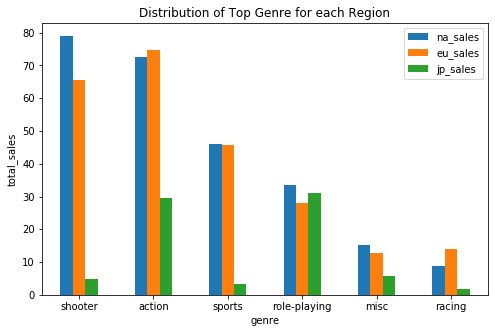

In [60]:
all_genre.plot(kind='bar', x='genre', figsize=(8,5), rot=0)
plt.gca().set(title='Distribution of Top Genre for each Region', ylabel='total_sales', xlabel='genre')
plt.show()

**Explain the difference:**

It can be seen that in America fans are mainly a shooter genre, in Europe mainly action and in Japan mainly role-playing. It can also be seen that in general America and Europe like more or less the same genres in the same ratio and this reinforces the claim that there are significant differences between Europe-America and Japan.

**3. Do ESRB ratings affect sales in individual regions?**

To check if there is an effect of rating on sales in different regions, remove the missing values in the rating column, sort the rating values with a very small amount and then create a bar chart for each region.

In [61]:
#Drop missing values:
games_rating=games.dropna(subset=['rating'])

In [62]:
#Value count of rating:
games_rating['rating'].value_counts()

t       271
m       265
e       219
e10+    185
Name: rating, dtype: int64

In [63]:
#Pivot table group by rating for all regions sales:
all_rating=games_rating.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], 
                                    aggfunc='sum').reset_index()

In [64]:
#Remove three type of rating (ec, rp, ao) that they are insignificant:
all_rating=all_rating[(all_rating['rating']=='e') | (all_rating['rating']=='e10+') | 
                      (all_rating['rating']=='m') | (all_rating['rating']=='t')]
all_rating.sort_values(by='eu_sales', ascending=False, inplace=True)
all_rating=all_rating[['rating', 'na_sales', 'eu_sales', 'jp_sales']]

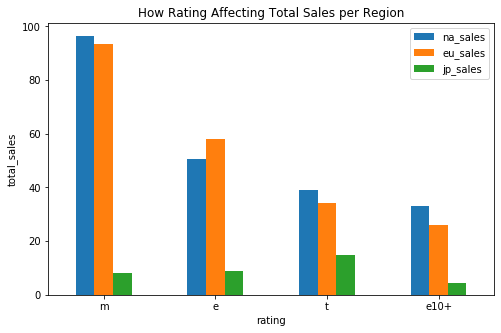

In [65]:
#Bar plot:
all_rating.plot(kind='bar', x='rating', figsize=(8,5), rot=0)
plt.gca().set(title='How Rating Affecting Total Sales per Region', ylabel='total_sales', xlabel='rating')
plt.show()

It can be seen that in America and Europe the most popular rating is "m" intended for ages 17 and up, compared to the most popular rating in Japan which is "t" intended for ages 13 and up. And so when launching a campaign think very much about adapting it to what is common in that region.

### Conclusion:

From the analysis above it can be seen that in most cases there are significant differences between the European-American countries and Japan and probably the reason for this is due to mental-cultural differences between the regions.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
You are right, it can be connected with cultural differences between these regions.
</div>

# 5. Test the following hypotheses:

**1. Average user ratings of the Xbox One and PC platforms are the same.**

We will write the null hypothesis and the alternative hypothesis:

* H0: Average user ratings of the Xbox One and PC platforms are the same.
* H1: Average user ratings of the Xbox One and PC platforms are not the same.

We will remove the missing values in the user_score column so that they do not skew the results and we will test the hypothesis using ind since this is a two-tailed hypothesis that checks whether the score of the users for the platforms Xbox one and PC are the same.

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Could you please check hypotheses formulation?
    
Please not ethat T-test is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values.
    
Please see for details: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
</div>

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Student comment:</b> I'm not sure I understood why that's not true. These are two populations that are independent on each other and I guess their average is the same. Therefore I will use the method of: "Hypothesis on the equality of two population mean".  I changed the order of the two hypotheses and maybe now it's okay?!</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, now hypotheses formulation is correct. The reason is that you have used T-tests which is for the null hypothesis that 2 independent samples have identical average (expected) values. So, it's necessary to formulate the null hypothesis as "we have no statistically significant differences ..." or "average ... are the same.".
</div>

In [66]:
#Drop missing values in user_score column:
games1=games.dropna(subset=['user_score'])

In [67]:
#Definition of the two populations
xbox_one=games1[games1['platform']=='xone']
x=xbox_one['user_score']

pc=games1[games1['platform']=='pc']
p=pc['user_score']

#Definition of alpha (Statistical significance level)
alpha=0.05

#T test to know p-value
results1 = st.ttest_ind(x, p)

print('P-value is', results1.pvalue)

#The condition for obtaining the null hypothesis
if results1.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('We can not reject the null hypothesis')

P-value is 0.10450507919348415
We can not reject the null hypothesis


In [68]:
x.mean()

6.594545454545456

In [69]:
p.mean()

6.298360655737705

According to the test, the null hypothesis can't be rejected since the average score for the two platforms is quite similar and close in value to each other.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, we don't have a statistically significant differences between average XBox One user ratings and PC user ratings.
</div>

**2. Average user ratings for the Action and Sports genres are different.**

We will write the null hypothesis and the alternative hypothesis:

* H0: Average user ratings for the Action and Sports genres are the same
* H1: Average user ratings for the Action and Sports genres are the different

We will remove the missing values in the user_score column so that they do not skew the results and we will test the hypothesis using ind since this is a two-tailed hypothesis.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Good job, hypotheses formulation is correct :)
</div>

In [70]:
action=games1[games1['genre']=='action']
a=action['user_score']

sports=games1[games1['genre']=='sports']
s=sports['user_score']

alpha=0.05

results1 = st.ttest_ind(a, s)

print('P-value is', results1.pvalue)

#The condition for obtaining the null hypothesis
if results1.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('We can not reject the null hypothesis')

P-value is 2.8711147985105864e-19
We reject the null hypothesis


In [71]:
a.mean()

6.760606060606061

In [72]:
s.mean()

5.2251968503937

According to the test, the null hypothesis can be rejected since the average score for the two platforms are not similar and are very different to each other.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, you are right, there is a statistically significant differences in the average user_scores for Action and Sport.
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Maybe his link will be interesting for you: https://ocw.mit.edu/courses/mathematics/18-443-statistics-for-applications-fall-2006/lecture-notes/lecture13.pdf 
</div>

# 6. General conclusion:

In this study, data were obtained from the Ice store that sells games online to customers around the world. The aim of the study was to launch a campaign for 2017 and for this purpose it was necessary to check which games and which platforms should be advertised and for which target audience, based on past data.

From the analysis of the data it can be seen that there is great significance to the type of game, the platform on which the game is played, the genre and the target audience in order to tailor the advertisement so that its results will increase sales.

Regarding the platform, the company must publish games that are supported on the ps4 platform, since this is the platform that is on a growth trend among all the existing platforms in the market. Beyond that, the rest of the platforms have to be tailored for certain areas since each area has different preferences.

As for the target audience, the company should advertise games that are suitable for as many age groups as possible as it expands the possibility of new customers of all ages entering.

Regarding the genre, there is great importance to the area where the advertisement is published and to each area to adapt the genres relevant to it.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
It's great that you clearly described main results of the project. 👍👍👍
</div>